Setting Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir='/content/gdrive/My Drive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing torch
import torch
#importinng the vision libraries for torch
import torchvision
#this will be used for plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#This is the library for Principal Component Analysis.
from sklearn.decomposition import PCA
#This is the library for TSNE analysis
from sklearn.manifold import TSNE
#We will use this to scale our data before processing it for PCA or t-SNE
from sklearn.preprocessing import StandardScaler

Defining data loaders

In [ ]:
#Colors will be used for plotting the visualization. Each color represents the corresponding class in each dataset.
colors=['red','orange','yellow','lime','green','cyan','blue','royalblue','indigo','violet']
FashionMNISTClasses=('T-Shirt','Trousers','Pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
MNISTClasses=('0','1','2','3','4','5','6','7','8','9')
FashionMNISTDataLoader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=1,shuffle=False)

MNISTDataLoader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=1,shuffle=False)

Now, let's define a function which would take these loaders and help visualize the dataset for us. This function will return an image consisting of all the images in the form of a gallery. Let's check out the images and then this function will become more clear.

In [ ]:
def visualizeDataset(loader):
  numberOfPlots=int(np.ceil(np.sqrt(len(loader))))
  images=[]
  for id,(image,target) in enumerate(loader):
    images.append(image[0][0])
  imageHeight=images[0].shape[0]
  imageWidth=images[0].shape[1]
  spriteImage = np.ones((imagHeight * numberOfPlots, imageWidth * numberOfPlots))
  for i in range(numberOfPlots):
          for j in range(numberOfPlots):
              currentPlot = i * numberOfPlots + j
              if currentPlot < len(images):
                  currentImage = images[currentPlot]
                  spriteImage[i * imageHeight:(i + 1) * imageHeight,
                  j * imageWidth:(j + 1) * imageWidth] = currentImage

  return spriteImage

Now that the function is ready, let's quickly view both the datasets.

In [ ]:
MNISTSpriteImage=visualizeDataset(MNISTDataLoader)
FashionMNISTSpriteImage=visualizeDataset(FashionMNISTDataLoader)


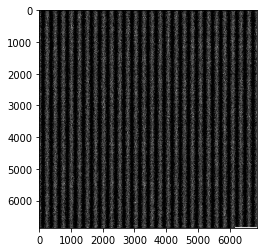

In [ ]:
plt.imshow(MNISTSpriteImage,cmap='gray')


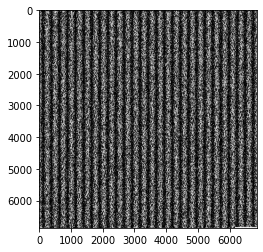

In [ ]:
plt.imshow(FashionMNISTSpriteImage,cmap='gray')

I want to save these images. You can choose to skip the following two lines of code.

In [ ]:
plt.imsave(root_dir+'MNISTSpriteImage.png',MNISTSpriteImage)
plt.imsave(root_dir+'FashionMNISTSpriteImage.png',FashionMNISTSpriteImage)

In [ ]:
def convertToVectors(loader):
  images=[]
  labels=[]
  for id,(image,target) in enumerate(loader):
    images.append(image[0][0])
    labels.append(target)
  tensorImages=torch.stack([image.reshape(image.shape[0]*image.shape[1]) for image in images])
  tensorLabels=torch.stack([label for label in labels])
  return tensorImages,tensorLabels


In [ ]:
def performPCA(data,components):
  scaler=StandardScaler()
  data=scaler.fit_transform(data)
  pca=PCA(n_components=components)
  transformedData=pca.fit_transform(data)
  return transformedData,pca.explained_variance_ratio_

In [ ]:
MNISTImageVectors,MNISTLabelVectors=convertToVectors(MNISTDataLoader)
FashionMNISTImageVectors,FashionMNISTLabelVectors=convertToVectors(FashionMNISTDataLoader)
transformedMNISTData1Component,MNISTDataVariance1Component=performPCA(MNISTImageVectors,1)
transformedFashionMNISTData1Component,FashionMNISTDataVariance1Component=performPCA(FashionMNISTImageVectors,1)

In [ ]:
print("MNIST 1 Component Variance: ",MNISTDataVariance1Component)
print("Fashion MNIST 1 Component Variance: ",FashionMNISTDataVariance1Component)

MNIST 1 Component Variance:  [0.05646717]
Fashion MNIST 1 Component Variance:  [0.22083547]


In [ ]:
def visualize1DPlots(data, labels, classes):
  handles=plt.scatter(data,[0 for vector in data],c=labels,
            cmap=matplotlib.colors.ListedColormap(colors))
  plt.xlim(right=max(data)+30)
  legendElements=handles.legend_elements()
  legendElements[1][:]=classes
  plt.legend(legendElements[0][:],legendElements[1][:],loc='best')
  plt.show()

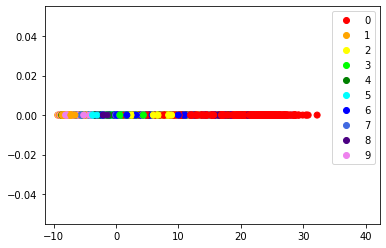

In [ ]:
visualize1DPlots(transformedMNISTData1Component,MNISTLabelVectors,MNISTClasses)

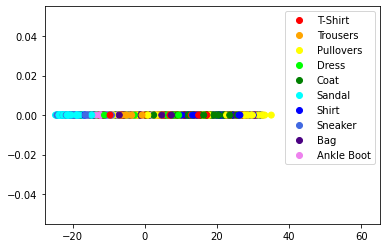

In [ ]:
visualize1DPlots(transformedFashionMNISTData1Component,FashionMNISTLabelVectors,FashionMNISTClasses)

Let's check the same details for 2 dimensions.

In [ ]:
transformedMNISTData2Component,MNISTDataVariance2Component=performPCA(MNISTImageVectors,2)
transformedFashionMNISTData2Component,FashionMNISTDataVariance2Component=performPCA(FashionMNISTImageVectors,2)

MNIST still does not cover a lot of data in the 2 dimensions. However, Fashion MNIST covers almost 36% of variance in 2 dimensions.

In [ ]:
print("MNIST 2 Component Variance: {0} \nMNIST 2 Component total variance: {1}".format(MNISTDataVariance2Component,np.sum(MNISTDataVariance2Component)))
print("Fashion MNIST 2 Component Variance: {0} \nFashionMNIST 2 Component total variance: {1}".format(FashionMNISTDataVariance2Component,np.sum(FashionMNISTDataVariance2Component)))

MNIST 2 Component Variance: [0.05646717 0.04078272] 
MNIST 2 Component total variance: 0.09724988909795834
Fashion MNIST 2 Component Variance: [0.22083547 0.14414633] 
FashionMNIST 2 Component total variance: 0.36498179924767726


In [ ]:
def visualize2DPlots(data, labels, classes):
  handles=plt.scatter(data[:,0],data[:,1],c=labels,
                      s=0.5,
            cmap=matplotlib.colors.ListedColormap(colors))
  plt.xlim(right=max(data[:,0])+25)
  legendElements=handles.legend_elements()
  legendElements[1][:]=classes
  plt.legend(legendElements[0][:],legendElements[1][:],loc='best')
  plt.show()

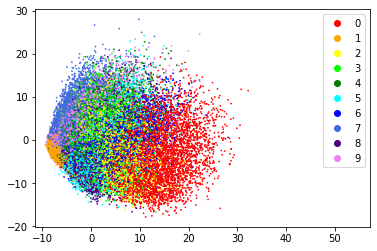

In [ ]:
visualize2DPlots(transformedMNISTData2Component,MNISTLabelVectors,MNISTClasses)

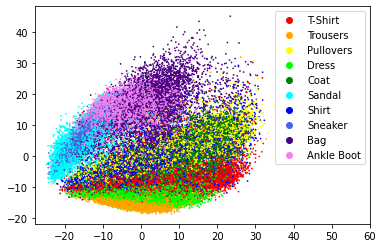

In [ ]:
visualize2DPlots(transformedFashionMNISTData2Component,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
transformedMNISTData3Component,MNISTDataVariance3Component=performPCA(MNISTImageVectors,3)
transformedFashionMNISTData3Component,FashionMNISTDataVariance3Component=performPCA(FashionMNISTImageVectors,3)

In [ ]:
print("MNIST 3 Component Variance: {0} \nMNIST 3 Component total variance: {1}".format(MNISTDataVariance3Component,np.sum(MNISTDataVariance3Component)))
print("Fashion MNIST 3 Component Variance: {0} \nFashionMNIST 3 Component total variance: {1}".format(FashionMNISTDataVariance3Component,np.sum(FashionMNISTDataVariance3Component)))

MNIST 3 Component Variance: [0.05646717 0.04078272 0.0373938 ] 
MNIST 3 Component total variance: 0.13464369341490973
Fashion MNIST 3 Component Variance: [0.22083547 0.14414633 0.05461176] 
FashionMNIST 3 Component total variance: 0.419593563076625


In [ ]:
def visualize3DPlots(data,labels,classes):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  plt.xlim(right=max(data[:,0]),left=min(data[:,0]))
  plt.ylim(top=max(data[:,1]),bottom=min(data[:,1]))
  handles=ax.scatter(data[:,0],
             data[:,1],
             zs=data[:,2],
             c=labels,
             s=0.5,cmap=matplotlib.colors.ListedColormap(colors))
  legendElements=handles.legend_elements()
  legendElements[1][:]=classes
  ax.legend(legendElements[0][:],legendElements[1][:],loc='best')
  plt.show()

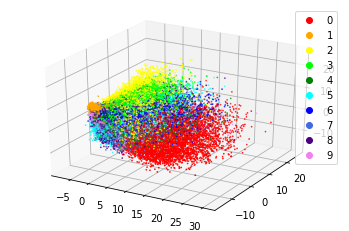

In [ ]:
visualize3DPlots(transformedMNISTData3Component,MNISTLabelVectors,MNISTClasses)

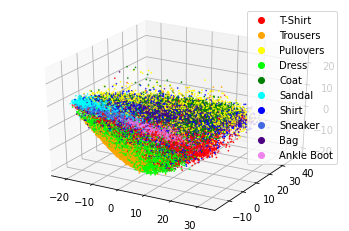

In [ ]:
visualize3DPlots(transformedFashionMNISTData3Component,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
_,MNISTDataVariance784Component=performPCA(MNISTImageVectors,784)
_,FashionMNISTDataVariance784Component=performPCA(FashionMNISTImageVectors,784)

<function matplotlib.pyplot.show>

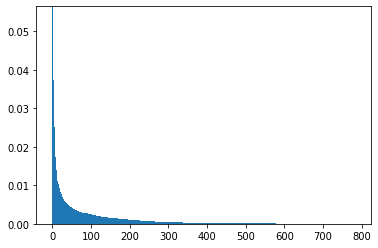

In [ ]:
plt.bar([i for i in range(len(MNISTDataVariance784Component))],MNISTDataVariance784Component,width=4)
plt.ylim(top=max(MNISTDataVariance784Component))
plt.show

<function matplotlib.pyplot.show>

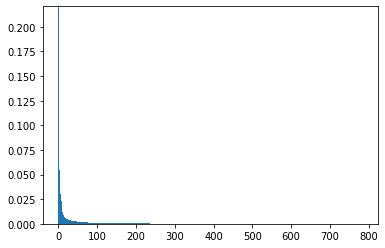

In [ ]:
plt.bar([i for i in range(len(FashionMNISTDataVariance784Component))],FashionMNISTDataVariance784Component,width=2)

plt.ylim(top=max(FashionMNISTDataVariance784Component))
plt.show

As can be seen from the two variance distribution, MNIST's variance is more evenly distributed across dimensions than Fashion MNIST. Fashion MNIST covers most of the distribution in less than 250 dimensions whereas MNIST goes upto almost 600 dimensions. Let's take a look at when does each of them cross 50%, 90% and 95% of variance.

In [ ]:
def cumulativePlot(data):
  plt.plot([i for i in range(len(data))],np.cumsum(data),color='blue')
  data50PercentVarianceIndex=np.where(np.cumsum(data)>=0.5)
  data90PercentVarianceIndex=np.where(np.cumsum(data)>=0.9)
  data95PercentVarianceIndex=np.where(np.cumsum(data)>=0.95)
  plt.plot(data50PercentVarianceIndex[0][0],np.cumsum(data)[data50PercentVarianceIndex[0][0]],color='red',marker='o')
  plt.plot(data90PercentVarianceIndex[0][0],np.cumsum(data)[data90PercentVarianceIndex[0][0]],color='red',marker='o')
  plt.plot(data95PercentVarianceIndex[0][0],np.cumsum(data)[data95PercentVarianceIndex[0][0]],color='red',marker='o')
  plt.show()

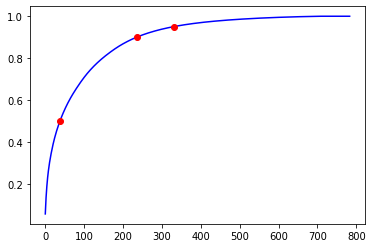

In [ ]:
cumulativePlot(MNISTDataVariance784Component)

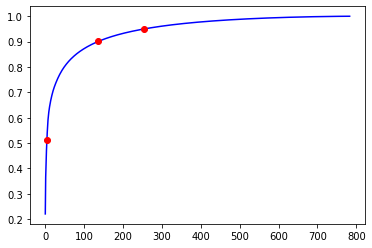

In [ ]:
cumulativePlot(FashionMNISTDataVariance784Component)

In [ ]:
def reduceDimensions(data,reductionPercent):
  pca=PCA(reductionPercent)
  reducedData=pca.fit_transform(data)
  reducedData=pca.inverse_transform(reducedData)
  return reducedData

In [ ]:
def convertVectorsToImages(imageVectors):
  images=[]
  for image in imageVectors:
    images.append(image.reshape(int(np.ceil(np.sqrt(len(image)))),int(np.ceil(np.sqrt(len(image))))))
  return images

In [ ]:
MNISTReducedData50=reduceDimensions(MNISTImageVectors,0.5)
MNISTReducedData90=reduceDimensions(MNISTImageVectors,0.9)
MNISTReducedData95=reduceDimensions(MNISTImageVectors,0.95)

FashionMNISTReducedData50=reduceDimensions(FashionMNISTImageVectors,0.5)
FashionMNISTReducedData90=reduceDimensions(FashionMNISTImageVectors,0.9)
FashionMNISTReducedData95=reduceDimensions(FashionMNISTImageVectors,0.95)

In [ ]:
MNISTImages=convertVectorsToImages(MNISTImageVectors)
MNISTReducedImages50=convertVectorsToImages(MNISTReducedData50)
MNISTReducedImages90=convertVectorsToImages(MNISTReducedData90)
MNISTReducedImages95=convertVectorsToImages(MNISTReducedData95)

FashionMNISTImages=convertVectorsToImages(FashionMNISTImageVectors)
FashionMNISTReducedImages50=convertVectorsToImages(FashionMNISTReducedData50)
FashionMNISTReducedImages90=convertVectorsToImages(FashionMNISTReducedData90)
FashionMNISTReducedImages95=convertVectorsToImages(FashionMNISTReducedData95)

In [ ]:
def visualizeImages(images):
  figs,axs=plt.subplots(2,2)
  axs[0, 0].imshow(images[0],cmap='gray')
  axs[0, 1].imshow(images[1],cmap='gray')
  axs[1, 0].imshow(images[2],cmap='gray')
  axs[1, 1].imshow(images[3],cmap='gray')
  plt.show()

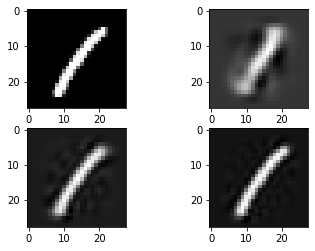

In [ ]:
randomIndex=np.random.randint(0,high=len(MNISTImageVectors))
MNISTImagesToVisualize=[]
MNISTImagesToVisualize.append(MNISTImages[randomIndex])
MNISTImagesToVisualize.append(MNISTReducedImages50[randomIndex])
MNISTImagesToVisualize.append(MNISTReducedImages90[randomIndex])
MNISTImagesToVisualize.append(MNISTReducedImages95[randomIndex])
visualizeImages(MNISTImagesToVisualize)

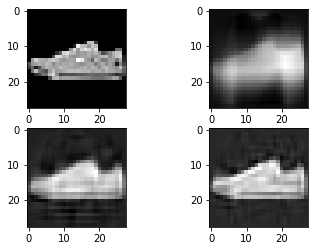

In [ ]:
FashionMNISTImagesToVisualize=[]
FashionMNISTImagesToVisualize.append(FashionMNISTImages[randomIndex])
FashionMNISTImagesToVisualize.append(FashionMNISTReducedImages50[randomIndex])
FashionMNISTImagesToVisualize.append(FashionMNISTReducedImages90[randomIndex])
FashionMNISTImagesToVisualize.append(FashionMNISTReducedImages95[randomIndex])
visualizeImages(FashionMNISTImagesToVisualize)

In [ ]:
def performTSNE(data,numberOfComponents,perplexity,numberOfIterations):
  tsne = TSNE(n_components=numberOfComponents, verbose=1, perplexity=perplexity, n_iter=numberOfIterations)
  tsneTransformedData=tsne.fit_transform(data)
  return tsneTransformedData

In [ ]:
MNISTTSNETransformedData=performTSNE(MNISTImageVectors,3,40,300)
FashionMNISTTSNETransformedData=performTSNE(FashionMNISTImageVectors,3,40,300)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 28.552s...
[t-SNE] Computed neighbors for 60000 samples in 6482.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

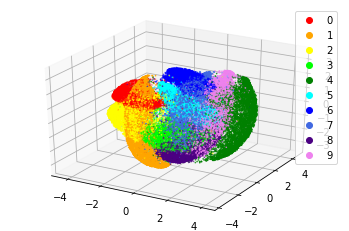

In [ ]:
visualize3DPlots(MNISTTSNETransformedData,MNISTLabelVectors,MNISTClasses)

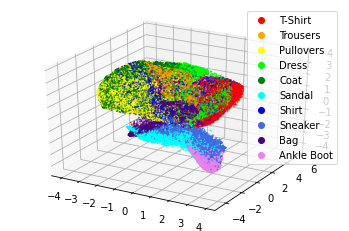

In [ ]:
visualize3DPlots(FashionMNISTTSNETransformedData,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
MNISTTSNETransformedData2D=performTSNE(MNISTTSNETransformedData,2,40,300)
FashionMNISTTSNETransformedData2D=performTSNE(FashionMNISTTSNETransformedData,2,40,300)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.042s...
[t-SNE] Computed neighbors for 60000 samples in 2.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

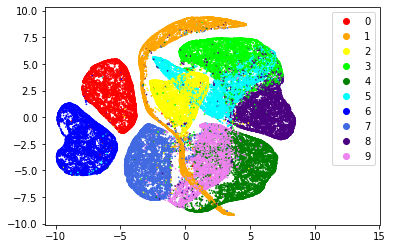

In [ ]:
visualize2DPlots(MNISTTSNETransformedData2D,MNISTLabelVectors,MNISTClasses)

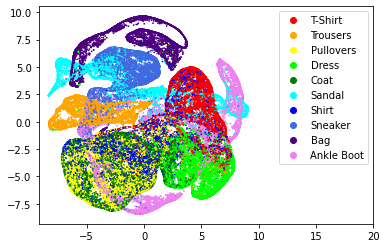

In [ ]:
visualize2DPlots(FashionMNISTTSNETransformedData2D,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
MNISTTSNETransformedData1D=performTSNE(MNISTTSNETransformedData,1,40,300)
FashionMNISTTSNETransformedData1D=performTSNE(FashionMNISTTSNETransformedData,1,40,300)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.039s...
[t-SNE] Computed neighbors for 60000 samples in 2.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

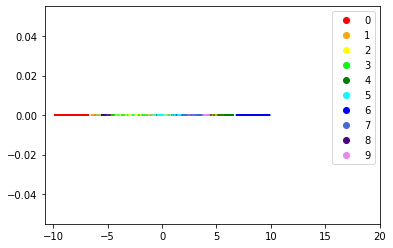

In [ ]:
visualize1DPlots(MNISTTSNETransformedData1D,MNISTLabelVectors,MNISTClasses)

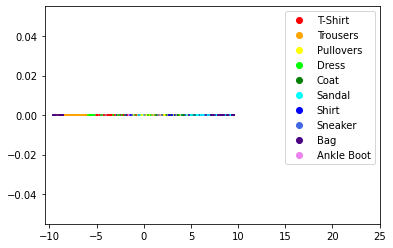

In [ ]:
visualize1DPlots(FashionMNISTTSNETransformedData1D,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
transformedMNISTData90PercentVariance,_=performPCA(MNISTImageVectors,0.6)
transformedFashionMNISTData90PercentVariance,_=performPCA(FashionMNISTImageVectors,0.6)

In [ ]:
MNISTTransformedTSNEwithPCA3D=performTSNE(transformedMNISTData90PercentVariance,3,40,300)
FashionMNISTTransformedTSNEwithPCA3D=performTSNE(transformedFashionMNISTData90PercentVariance,3,40,300)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.789s...
[t-SNE] Computed neighbors for 60000 samples in 889.913s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

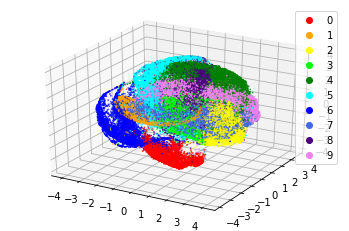

In [ ]:
visualize3DPlots(MNISTTransformedTSNEwithPCA3D,MNISTLabelVectors,MNISTClasses)

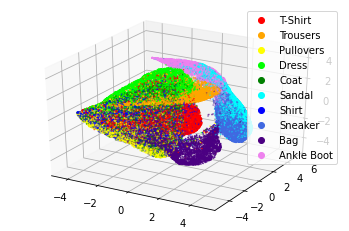

In [ ]:
visualize3DPlots(FashionMNISTTransformedTSNEwithPCA3D,FashionMNISTLabelVectors,FashionMNISTClasses)

In [ ]:
MNISTTransformedTSNEwithPCA2D=performTSNE(MNISTTransformedTSNEwithPCA3D,2,40,300)
FashionMNISTTransformedTSNEwithPCA2D=performTSNE(FashionMNISTTransformedTSNEwithPCA3D,2,40,300)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.047s...
[t-SNE] Computed neighbors for 60000 samples in 2.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

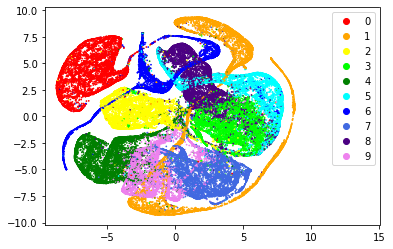

In [ ]:
visualize2DPlots(MNISTTransformedTSNEwithPCA2D,MNISTLabelVectors,MNISTClasses)

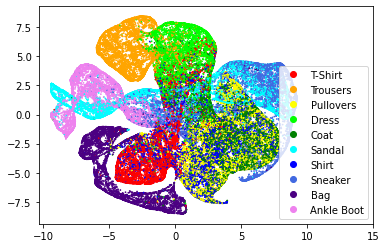

In [ ]:
visualize2DPlots(FashionMNISTTransformedTSNEwithPCA2D,FashionMNISTLabelVectors,FashionMNISTClasses)